In [6]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample (1).csv


In [7]:
import pandas as pd

df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Data Exploration**

In [8]:
df.shape


(2823, 25)

In [9]:
df.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [11]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [12]:
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


**Data Cleaning**

In [13]:
import pandas as pd

# تحويل التاريخ
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# حذف الأعمدة غير المهمة
df.drop(['PHONE', 'ADDRESSLINE2', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1, inplace=True)

# التأكد من القيم الناقصة بعد التنظيف
print(df.isnull().sum())

# التأكد من القيم السلبية
print(df[df['SALES'] < 0])

# التأكد من الكميات الغير منطقية
print(df[df['QUANTITYORDERED'] <= 0])

# استعراض البيانات بعد التنظيف
df.head()



ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
ADDRESSLINE1          0
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
TERRITORY          1074
DEALSIZE              0
dtype: int64
Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, ADDRESSLINE1, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, DEALSIZE]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, ADDRESSLINE1, C

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Medium


المبيعات حسب السنة


In [14]:
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
print(sales_by_year)


   YEAR_ID       SALES
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71


In [15]:
!wget -O Amiri-Regular.ttf https://github.com/aliftype/amiri-font/raw/master/amiri-regular.ttf


--2025-04-22 10:10:51--  https://github.com/aliftype/amiri-font/raw/master/amiri-regular.ttf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-22 10:10:52 ERROR 404: Not Found.



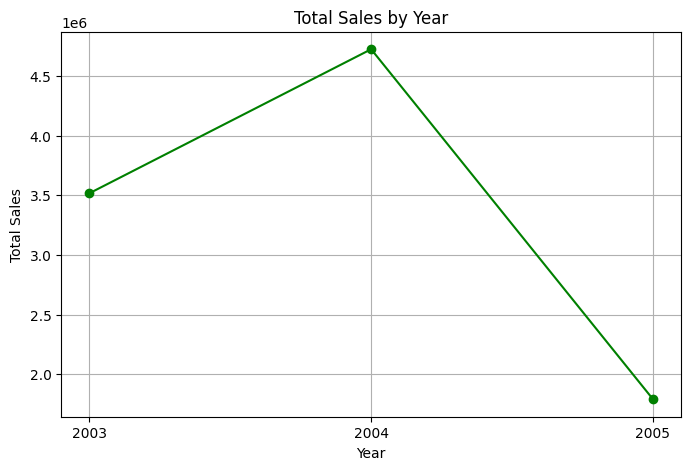

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(sales_by_year['YEAR_ID'], sales_by_year['SALES'], marker='o', color='green')

plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# تصحيح القيم على محور X
plt.xticks(sales_by_year['YEAR_ID'].astype(int))

plt.grid(True)
plt.show()




In [21]:
# Assuming 'df' is your original DataFrame
# Calculate previous year sales (you might need to adjust this based on your data)
df['previous_year_sales'] = df.groupby('PRODUCTLINE')['SALES'].shift(1)

# Filter data for declining sales
filtered_df = df[df['SALES'] < df['previous_year_sales']]

# Now you can proceed with the rest of your code
sales_by_year = filtered_df.groupby('YEAR_ID')['SALES'].sum().reset_index()
# ...

In [22]:
sales_by_year = filtered_df.groupby('YEAR_ID')['SALES'].sum().reset_index()

In [20]:
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
print(sales_by_product)


        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84


SyntaxError: keyword argument repeated: loc (<ipython-input-45-9251ad1951de>, line 15)

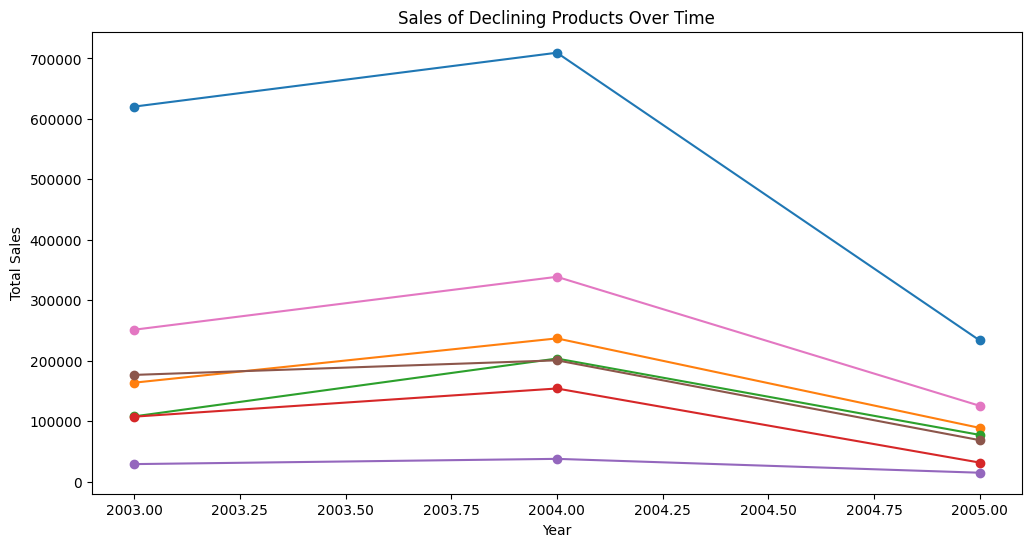

In [45]:
import matplotlib.pyplot as plt

# Assuming you have 'filtered_df' from the previous step
sales_by_product_year = filtered_df.groupby(['YEAR_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))

for product in sales_by_product_year['PRODUCTLINE'].unique():
    product_data = sales_by_product_year[sales_by_product_year['PRODUCTLINE'] == product]
    plt.plot(product_data['YEAR_ID'], product_data['SALES'], marker='o', label=product)

plt.title('Sales of Declining Products Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.plot(product_data['YEAR_ID'], product_data['SALES'], marker='o', label=product, color='red')
plt.grid(True)
plt.show()

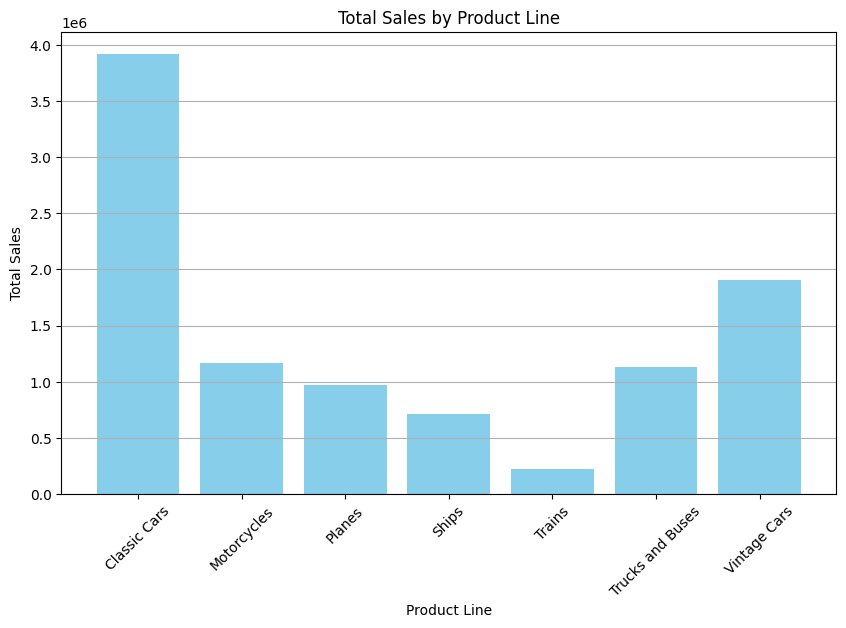

In [23]:
plt.figure(figsize=(10,6))
plt.bar(sales_by_product['PRODUCTLINE'], sales_by_product['SALES'], color='skyblue')

plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # تدوير أسماء المنتجات
plt.grid(axis='y')
plt.show()


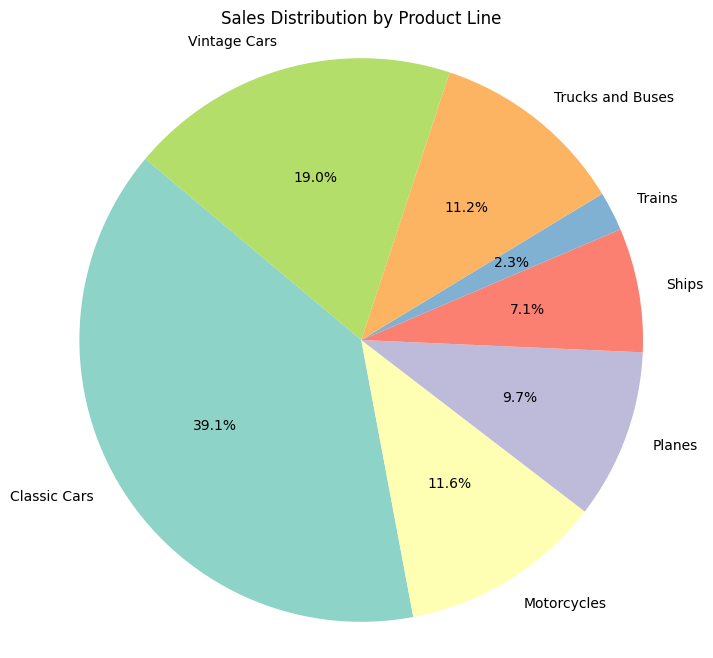

In [24]:
plt.figure(figsize=(8,8))
plt.pie(sales_by_product['SALES'],
        labels=sales_by_product['PRODUCTLINE'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors)

plt.title('Sales Distribution by Product Line')
plt.axis('equal')  # علشان يكون الدائرة مضبوطة
plt.show()


In [25]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)


,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


In [26]:
df.groupby('DEALSIZE')['SALES'].sum()


,SALES
DEALSIZE,
Large,1302119.26
Medium,6087432.24
Small,2643077.35


In [27]:
df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)


,SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
"Dragon Souveniers, Ltd.",172989.68
Land of Toys Inc.,164069.44
The Sharp Gifts Warehouse,160010.27
"AV Stores, Co.",157807.81


In [28]:
df.groupby('QTR_ID')['SALES'].sum()


,SALES
QTR_ID,
1,2350817.73
2,2048120.30
3,1758910.81
4,3874780.01


In [29]:
df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)


,SALES
PRODUCTCODE,
S18_3232,288245.42
S10_1949,191073.03
S10_4698,170401.07
S12_1108,168585.32
S18_2238,154623.95
S12_3891,145332.04
S24_3856,140626.90
S12_2823,140006.16
S18_1662,139421.97


**Sales by Country:**

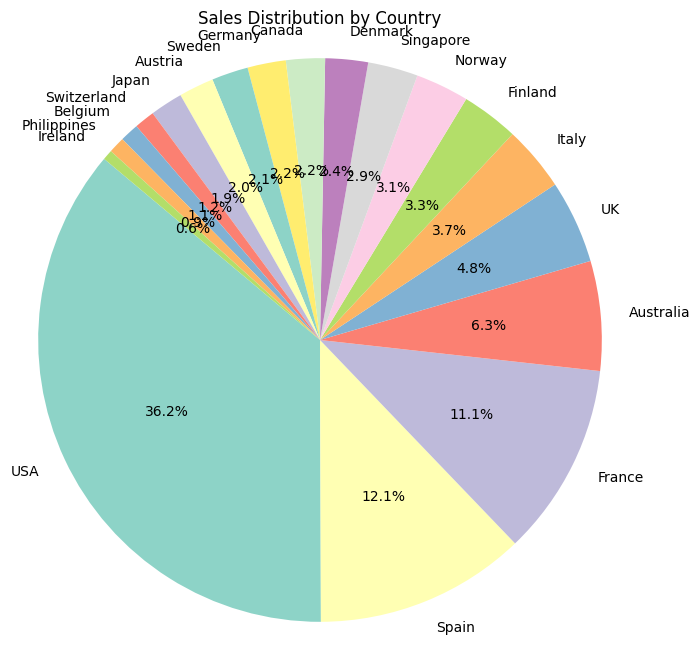

In [30]:
# Grouping sales by country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Pie chart for sales distribution by country
plt.figure(figsize=(8,8))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Sales Distribution by Country')
plt.axis('equal')
plt.show()



**Sales by Deal Size**

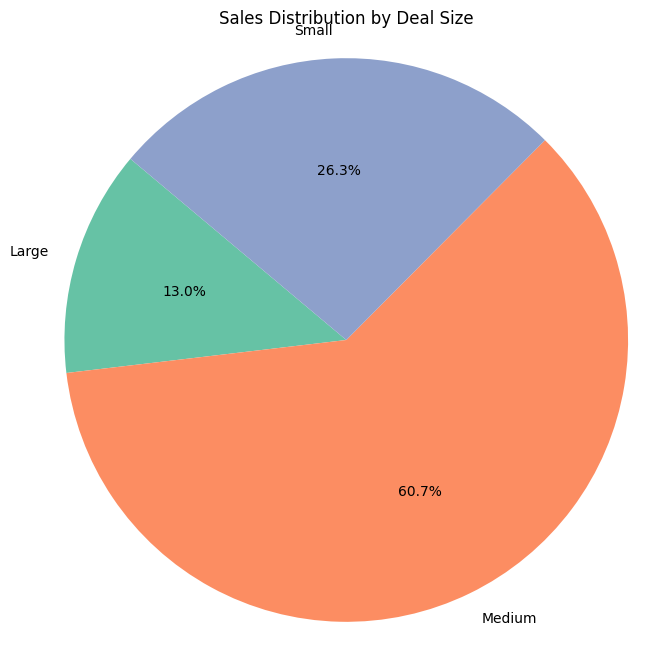

In [31]:
# Grouping sales by deal size
sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum()

# Pie chart for sales distribution by deal size
plt.figure(figsize=(8,8))
plt.pie(sales_by_dealsize, labels=sales_by_dealsize.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Sales Distribution by Deal Size')
plt.axis('equal')
plt.show()


**Sales by Order Status**

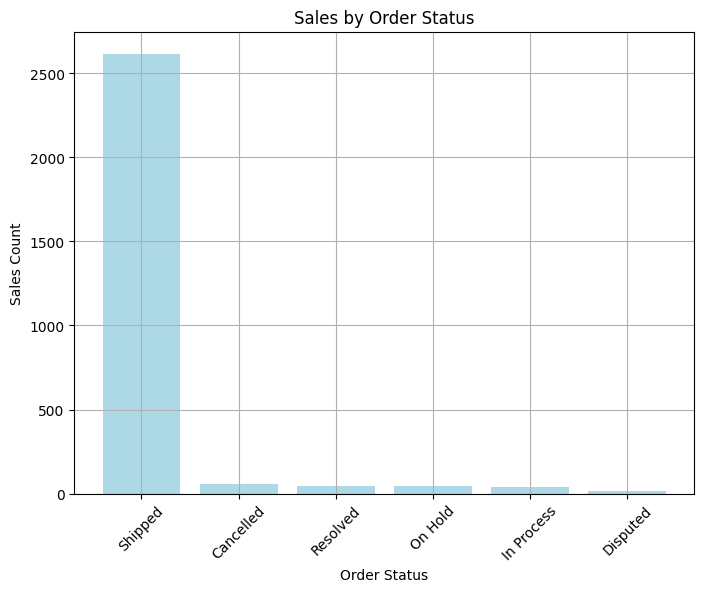

In [32]:
# Count sales by order status
sales_by_status = df['STATUS'].value_counts()

# Bar chart for sales by order status
plt.figure(figsize=(8,6))
plt.bar(sales_by_status.index, sales_by_status.values, color='lightblue')
plt.title('Sales by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Top 10 Customers by Sales:**

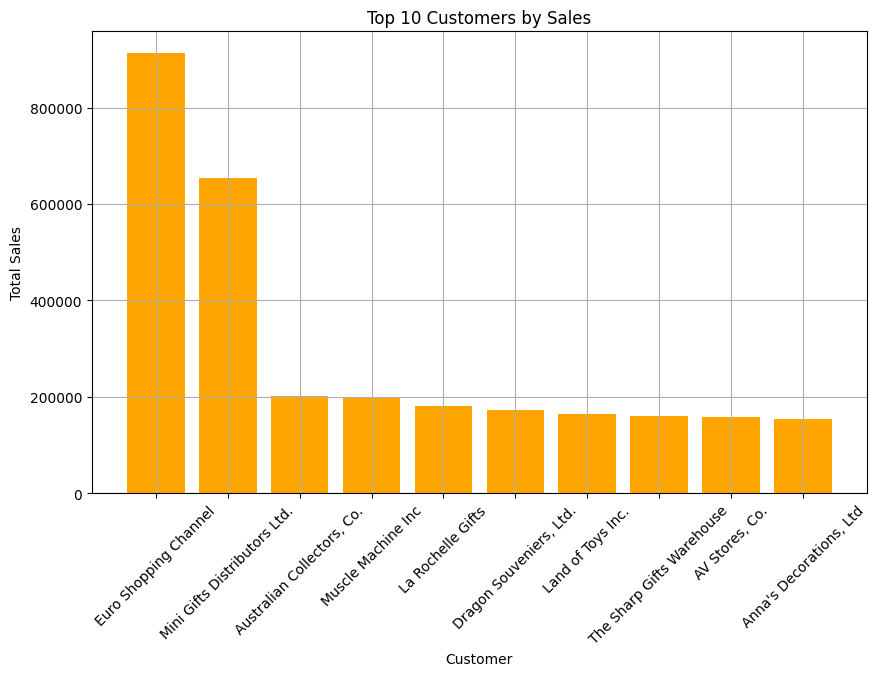

In [33]:
# Grouping sales by customer
top_10_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

# Bar chart for top 10 customers by sales
plt.figure(figsize=(10,6))
plt.bar(top_10_customers.index, top_10_customers.values, color='orange')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Sales by Quarter (QTR_ID):**

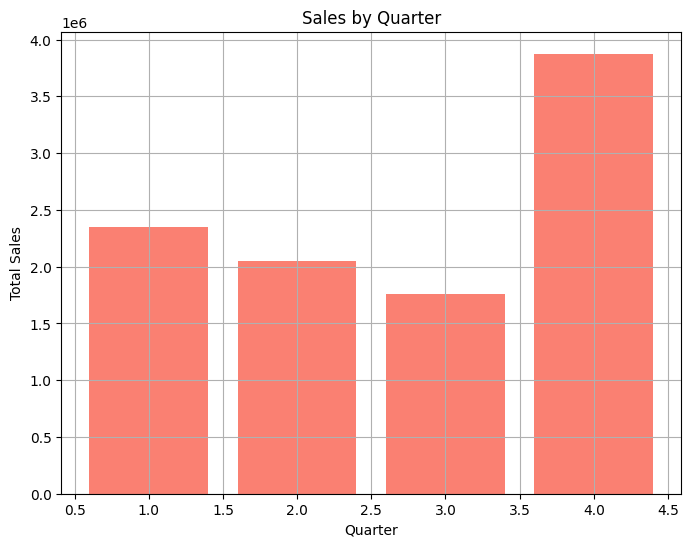

In [34]:
# Grouping sales by quarter
sales_by_quarter = df.groupby('QTR_ID')['SALES'].sum()

# Bar chart for sales by quarter
plt.figure(figsize=(8,6))
plt.bar(sales_by_quarter.index, sales_by_quarter.values, color='salmon')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Top 10 Products by Sales**

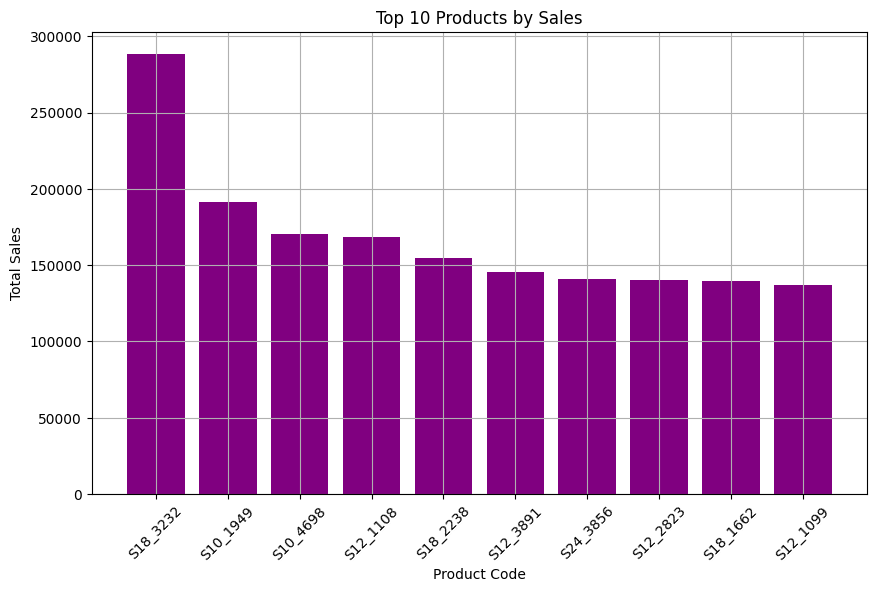

In [35]:
# Grouping sales by product code
top_10_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)

# Bar chart for top 10 products by sales
plt.figure(figsize=(10,6))
plt.bar(top_10_products.index, top_10_products.values, color='purple')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


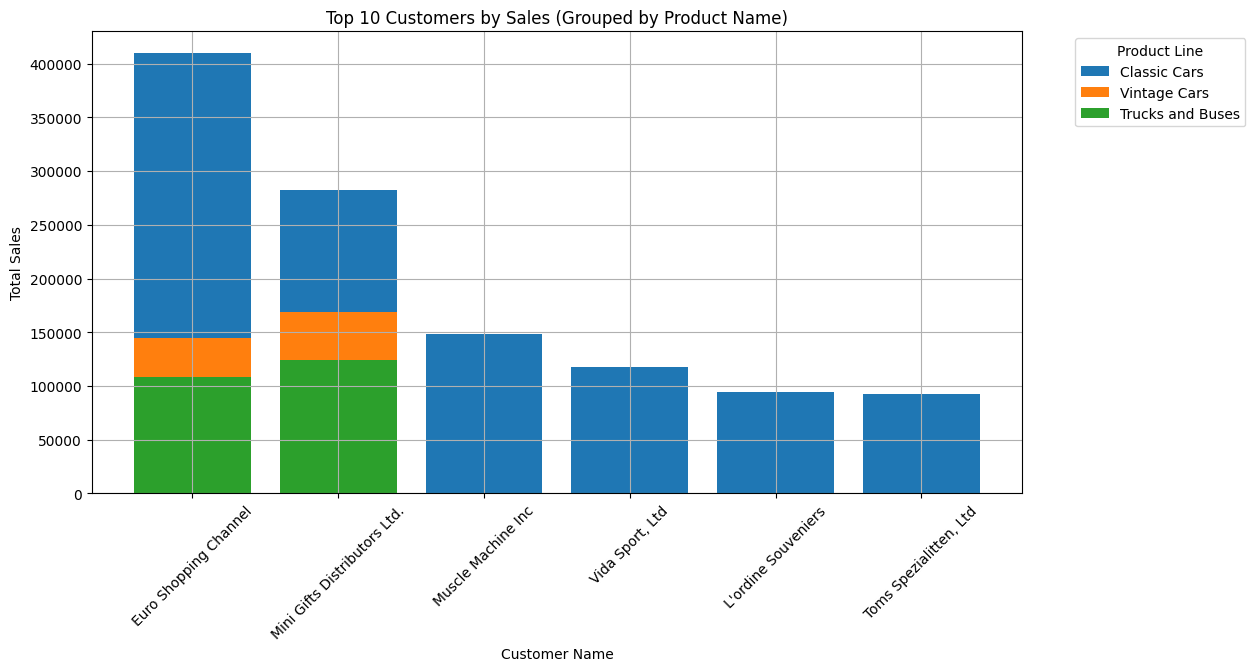

In [36]:
# Grouping sales by customer and product name
customer_product_sales = df.groupby(['CUSTOMERNAME', 'PRODUCTLINE'])['SALES'].sum().reset_index()

# Sorting the data by sales to get the top customers for each product
top_customers_by_product = customer_product_sales.sort_values(by='SALES', ascending=False)

# Extracting the top 10 customers based on the highest sales
top_10_customers_by_product = top_customers_by_product.head(10)

# Plotting a bar chart for the top 10 customers by product
plt.figure(figsize=(12,6))
for i, product in enumerate(top_10_customers_by_product['PRODUCTLINE'].unique()):
    product_data = top_10_customers_by_product[top_10_customers_by_product['PRODUCTLINE'] == product]
    plt.bar(product_data['CUSTOMERNAME'], product_data['SALES'], label=product)

plt.title('Top 10 Customers by Sales (Grouped by Product Name)')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Price vs Quantity Ordered (Scatter Plot)**

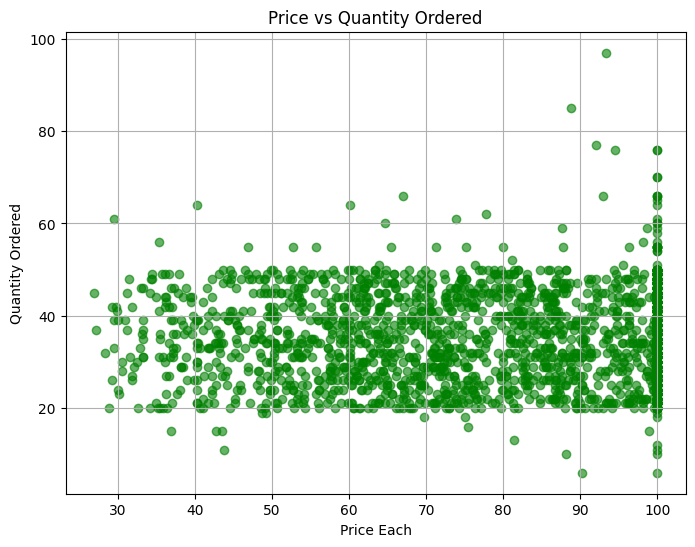

In [37]:
# Scatter plot for price vs quantity ordered
plt.figure(figsize=(8,6))
plt.scatter(df['PRICEEACH'], df['QUANTITYORDERED'], alpha=0.6, color='green')
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()


In [39]:
import pandas as pd
import numpy as np

# تحويل عمود التاريخ
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# تحويل عمود التاريخ إلى قيمة رقمية (timestamp)
df['ORDERDATE_TIMESTAMP'] = df['ORDERDATE'].astype(np.int64) // 10**9

# تحديد الأعمدة الرقمية فقط (بما في ذلك عمود timestamp الجديد)
numeric_cols = df.select_dtypes(include=np.number).columns

# التعامل مع القيم المفقودة في الأعمدة الرقمية فقط
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# يمكنك الآن متابعة تنفيذ بقية الكود

In [41]:
import pandas as pd
import numpy as np

# تحويل عمود التاريخ إلى قيمة رقمية (timestamp)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE_TIMESTAMP'] = df['ORDERDATE'].astype(np.int64) // 10**9

# تحديد الأعمدة الرقمية
numeric_cols = df.select_dtypes(include=np.number).columns

# حساب المتوسط لكل عمود رقمي وتخزينه في قاموس
means = {}
for col in numeric_cols:
    means[col] = np.mean(df[col].dropna())  # تجاهل القيم المفقودة عند حساب المتوسط

# ملء القيم المفقودة في كل عمود رقمي
for col in numeric_cols:
    df[col].fillna(means[col], inplace=True)

# تابع بقية الكود الخاص ببناء النموذج

<ipython-input-41-e8635b8f25cf>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(means[col], inplace=True)


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# قراءة البيانات
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# تحويل 'ORDERDATE' إلى datetime
try:
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
except ValueError:
    print("Error converting ORDERDATE to datetime.")

# تحويل 'ORDERDATE' إلى قيمة رقمية (timestamp)
df['ORDERDATE_TIMESTAMP'] = df['ORDERDATE'].astype(np.int64) // 10**9

# تحديد الأعمدة الرقمية (بما في ذلك عمود timestamp الجديد)
numeric_cols = df.select_dtypes(include=np.number).columns

# حساب المتوسط لكل عمود رقمي وتخزينه في قاموس
means = df[numeric_cols].mean()

# ملء القيم المفقودة في الأعمدة الرقمية
df[numeric_cols] = df[numeric_cols].fillna(means)

# تحويل الأعمدة النصية إلى أرقام باستخدام Label Encoding
label_encoder = LabelEncoder()
for column in ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']:  # إضافة الأعمدة النصية الأخرى
    if df[column].dtype == 'object':  # فقط إذا كان نوع العمود هو "object"
        df[column] = label_encoder.fit_transform(df[column])

# تحديد الميزات والهدف
X = df[['QUANTITYORDERED', 'PRICEEACH', 'QTR_ID', 'YEAR_ID', 'STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']]  # إضافة الميزات الجديدة
y = df['SALES']

# تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 934.6045906096771
R-squared (R²): 0.7998836834775535
